In [14]:
# Import the libraries we will use
import pandas as pd 
import matplotlib.pyplot as plt
import matplotlib as mpl
from fbprophet import Prophet
from datetime import datetime
from datetime import timedelta


# Set the plot style and size for embedded plots
plt.style.use('ggplot')
%pylab inline
pylab.rcParams['figure.figsize'] = (10, 6)

# Set a float format as we'll always be looking at USD monetary values
pd.options.display.float_format = '${:,.2f}'.format

Populating the interactive namespace from numpy and matplotlib


In [15]:
# Read in hourly bitcoin price from conbase - price data provided via http://bitcoinity.org
df = pd.read_csv('http://data.bitcoinity.org/export_data.csv?currency=USD&data_type=price&exchange=coinbase&r=hour&t=l&timespan=30d', parse_dates=['Time'])

# Set the date/time to be the index for the dataframe
df.set_index('Time', inplace=True)
df.head()

,avg,max,min
Time,,,
2017-11-04 22:00:00,"$7,428.89","$7,477.48","$7,369.05"
2017-11-04 23:00:00,"$7,432.01","$7,477.00","$7,385.00"
2017-11-05 00:00:00,"$7,368.14","$7,413.52","$7,323.00"
2017-11-05 01:00:00,"$7,408.01","$7,438.21","$7,361.00"
2017-11-05 02:00:00,"$7,410.12","$7,425.00","$7,400.00"


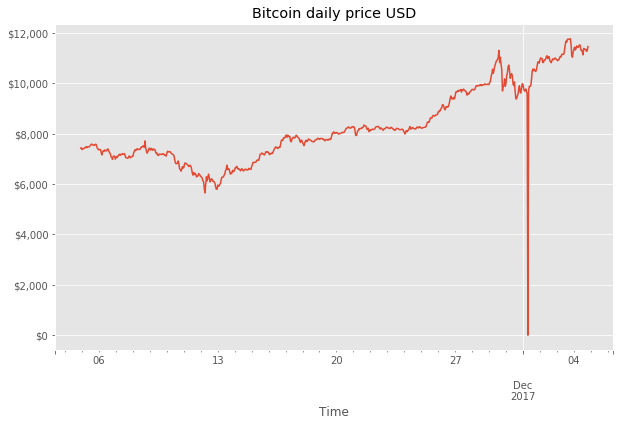

In [16]:
# Plot the hourly prices

ax = df['avg'].plot(title="Bitcoin daily price USD")
ax.yaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('${x:,.0f}'))

In [17]:
# For forecasting, Prophet requires a dataframe with two columns:
# 'ds' for the date/time
# 'y' for the value to forecast

df['ds'] = df.index
df['y'] = df['avg']

forecast_data = df[['ds', 'y']].copy()
forecast_data.reset_index(inplace=True)
del forecast_data['Time']
forecast_data.head()

,ds,y
0,2017-11-04 22:00:00,"$7,428.89"
1,2017-11-04 23:00:00,"$7,432.01"
2,2017-11-05 00:00:00,"$7,368.14"
3,2017-11-05 01:00:00,"$7,408.01"
4,2017-11-05 02:00:00,"$7,410.12"


In [18]:
# Create the Prophet model and fit the data

m = Prophet()
m.fit(forecast_data);

future = m.make_future_dataframe(periods=96, freq='H')
future.tail()

forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

INFO:fbprophet.forecaster:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


,ds,yhat,yhat_lower,yhat_upper
810,2017-12-08 16:00:00,"$12,529.02","$11,823.94","$13,169.13"
811,2017-12-08 17:00:00,"$12,532.36","$11,863.93","$13,195.45"
812,2017-12-08 18:00:00,"$12,520.68","$11,857.67","$13,142.18"
813,2017-12-08 19:00:00,"$12,515.15","$11,827.57","$13,161.09"
814,2017-12-08 20:00:00,"$12,528.87","$11,845.17","$13,171.86"


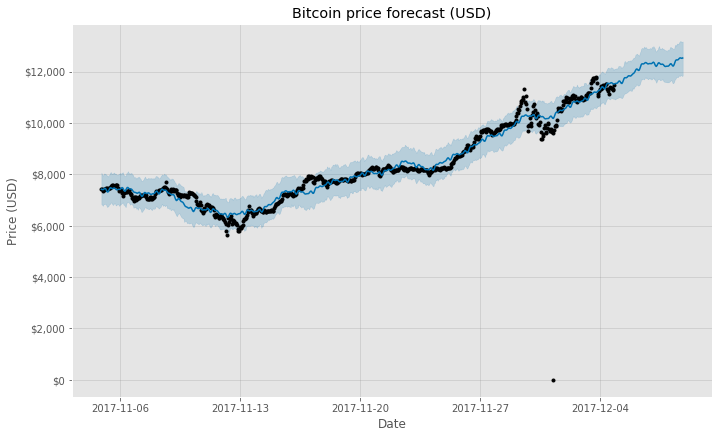

In [19]:
# Plot the forecast
fig = m.plot(forecast, xlabel='Date', ylabel='Price (USD)');
plt.title('Bitcoin price forecast (USD)')
fig.gca().yaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('${x:,.0f}'))

In [37]:
# What's the forecast for the next hour?

start_date =  datetime.now()
end_date = start_date + timedelta(hours=1)

forecast[(forecast['ds'] >= start_date) & (forecast['ds'] <= end_date)].head()[['ds','yhat']]

,ds,yhat
720,2017-12-04 22:00:00,"$11,537.12"


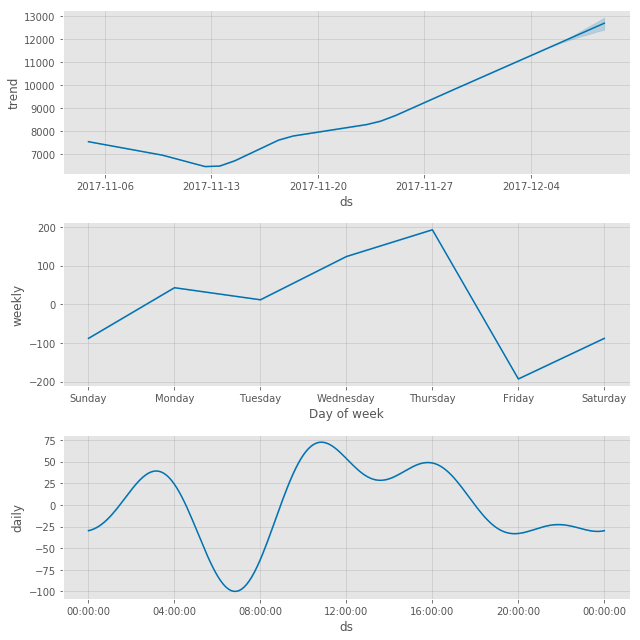

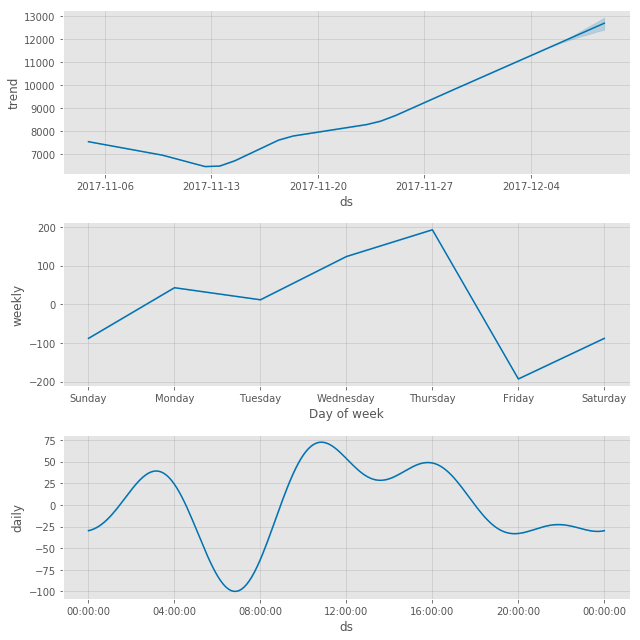

In [21]:
# Let's look at the model components to see what trends and seasonality has been detected
# It looks like the cheapest time to buy bitcoin is 06:00am on a Friday

m.plot_components(forecast)